In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df_weather = pd.read_csv(
    filepath_or_buffer="dbs/weatherAUS.csv",
    engine="pyarrow")

col_names_without_spaces = df_weather.columns.str.replace(" ", "")
df_weather.columns = col_names_without_spaces

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           145460 non-null  object
 1   Location       145460 non-null  object
 2   MinTemp        145460 non-null  object
 3   MaxTemp        145460 non-null  object
 4   Rainfall       145460 non-null  object
 5   Evaporation    145460 non-null  object
 6   Sunshine       145460 non-null  object
 7   WindGustDir    145460 non-null  object
 8   WindGustSpeed  145460 non-null  object
 9   WindDir9am     145460 non-null  object
 10  WindDir3pm     145460 non-null  object
 11  WindSpeed9am   145460 non-null  object
 12  WindSpeed3pm   145460 non-null  object
 13  Humidity9am    145460 non-null  object
 14  Humidity3pm    145460 non-null  object
 15  Pressure9am    145460 non-null  object
 16  Pressure3pm    145460 non-null  object
 17  Cloud9am       145460 non-null  object
 18  Clou

In [68]:
df_weather_reduced = df_weather[["Date","Location","Rainfall"]].copy()
df_weather_reduced["Date"] = pd.to_datetime(df_weather_reduced["Date"])
df_weather_reduced["Location"] = df_weather_reduced["Location"].str.replace(" ", "")
df_weather_reduced["Rainfall"] = pd.to_numeric(df_weather_reduced["Rainfall"], errors='coerce', downcast='float')
df_weather_reduced.info()
print(df_weather_reduced["Location"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      145460 non-null  datetime64[ns]
 1   Location  145460 non-null  object        
 2   Rainfall  142199 non-null  float32       
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 2.8+ MB
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [91]:
location = 'Perth'

# Filtrar el dataframe reducido por la ubicación deseada
df_weather_location = df_weather_reduced[df_weather_reduced['Location'] == location].copy()

# Crear un rango de fechas completo desde la fecha mínima hasta la fecha máxima
init_date = df_weather_location['Date'].min()
end_date = df_weather_location['Date'].max()
complete_date_range = pd.date_range(start=init_date, end=end_date, freq='D')

# Reindexar el dataframe para incluir todas las fechas del rango completo
df_weather_location.set_index('Date', inplace=True)
df_weather_location = df_weather_location.reindex(complete_date_range)
df_weather_location.drop(columns=['Location'], inplace=True)
df_weather_location.index.name = 'Date'

# Se agregan columnas adicionales de período de tiempo
df_weather_location['Year'] = df_weather_location.index.year
df_weather_location['Month'] = df_weather_location.index.month
df_weather_location['Day'] = df_weather_location.index.day

# Rellenar los valores NaN en la columna 'Rainfall' con 0
df_weather_location.fillna(value={'Rainfall': 0}, inplace=True)
df_weather_location.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-07-01 to 2017-06-25
Freq: D
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rainfall  3282 non-null   float32
 1   Year      3282 non-null   int32  
 2   Month     3282 non-null   int32  
 3   Day       3282 non-null   int32  
dtypes: float32(1), int32(3)
memory usage: 76.9 KB


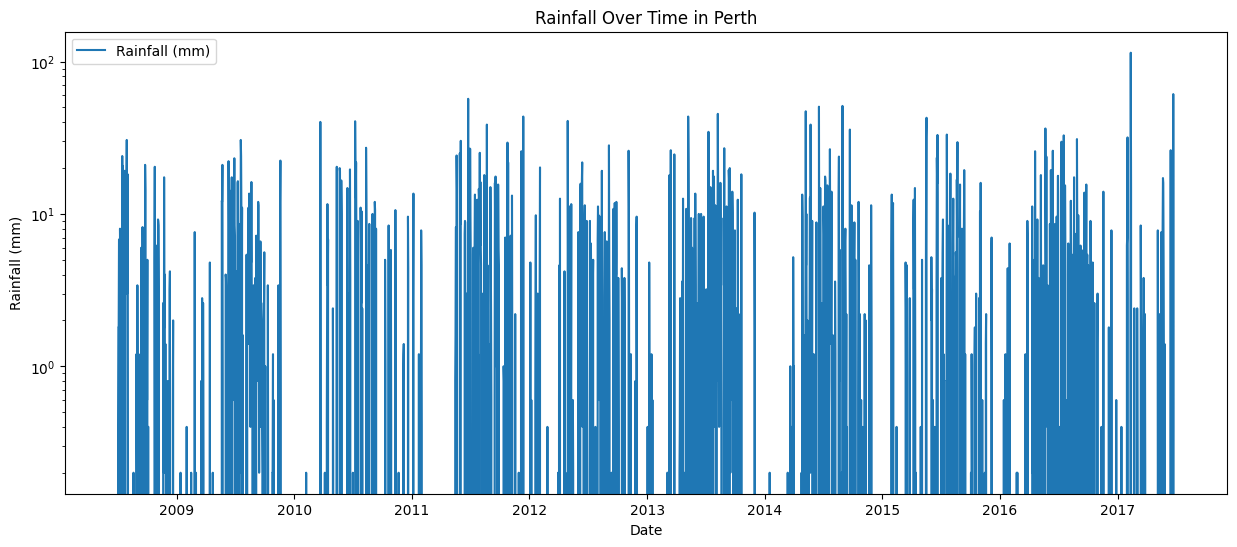

In [106]:
# Visualizar los datos de lluvia a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(df_weather_location.index, df_weather_location['Rainfall'], label='Rainfall (mm)')
plt.title(f'Rainfall Over Time in {location}')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

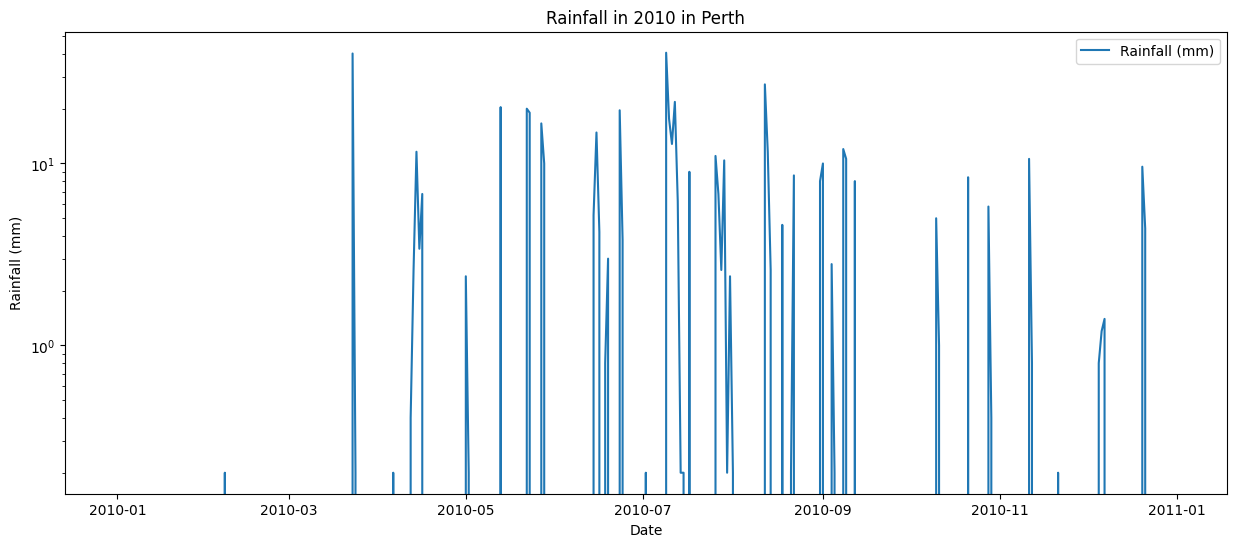

In [160]:
# Visualizar los datos de un solo año específico (por ejemplo, 2010)
df_weather_2010 = df_weather_location[df_weather_location['Year'] == 2010]
plt.figure(figsize=(15, 6))
plt.plot(df_weather_2010.index, df_weather_2010['Rainfall'], label='Rainfall (mm)')
plt.title(f'Rainfall in 2010 in {location}')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

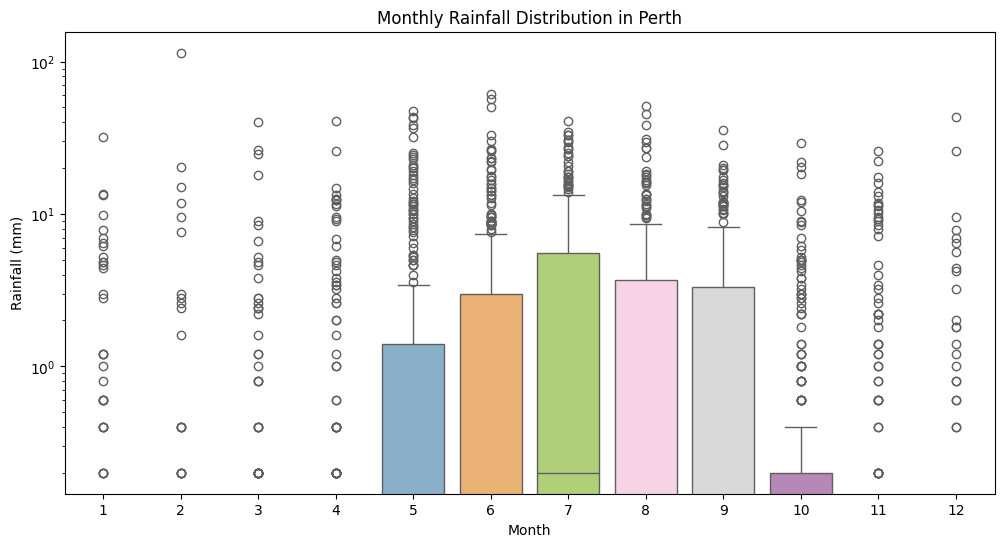

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_weather_location, x='Month', y='Rainfall', hue='Month', palette='Set3', legend=False)
plt.title(f'Monthly Rainfall Distribution in {location}')
plt.yscale('log')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

In [ ]:
# Calcular el porcentaje de días con lluvia en cada mes por año
rainy_days = df_weather_location[df_weather_location['Rainfall'] > 0]

rainy_days_count = rainy_days.groupby(['Year', 'Month']).size().reset_index(name='RainyDaysCount')

total_days_count = df_weather_location.groupby(['Year', 'Month']).size().reset_index(name='TotalDaysCount')

rain_percentage = pd.merge(rainy_days_count, total_days_count, on=['Year', 'Month'])

rain_percentage['RainPercentage'] = (rain_percentage['RainyDaysCount'] / rain_percentage['TotalDaysCount']) * 100
print(rain_percentage.head())

   Year  Month  RainyDaysCount  TotalDaysCount  RainPercentage
0  2008      7              20              31       64.516129
1  2008      8               6              31       19.354839
2  2008      9              17              30       56.666667
3  2008     10               9              31       29.032258
4  2008     11              13              30       43.333333


In [139]:
# Se calcula media y el desvío estándar del porcentaje de días con lluvia por mes
monthly_rain_stats = rain_percentage.groupby('Month')['RainPercentage'].agg(['mean', 'std']).reset_index()
monthly_rain_stats.rename(columns={'mean': 'MeanRainPercentage', 'std': 'StdRainPercentage'}, inplace=True)
print(monthly_rain_stats)

    Month  MeanRainPercentage  StdRainPercentage
0       1           12.903226           8.087525
1       2           10.098522           5.219118
2       3           16.532258          10.118592
3       4           24.761905          11.996472
4       5           32.616487          16.950412
5       6           41.407407          16.039688
6       7           51.612903          13.590564
7       8           47.670251          18.016770
8       9           47.407407          21.780329
9      10           26.881720           6.842969
10     11           18.888889          12.472191
11     12           11.827957           6.663197


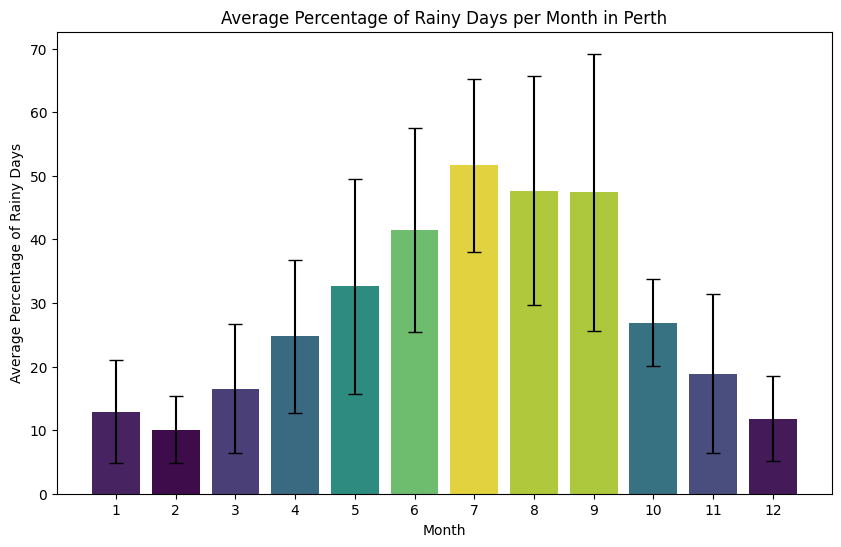

In [159]:
# Visualizar el porcentaje medio de días con lluvia por mes con barras de error
# Plot con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_rain_stats, x='Month', y='MeanRainPercentage', hue=monthly_rain_stats['MeanRainPercentage'], palette="viridis", legend=False)
# Barras de error
plt.errorbar(x=monthly_rain_stats['Month'] - 1, y=monthly_rain_stats['MeanRainPercentage'], yerr=monthly_rain_stats['StdRainPercentage'], fmt='none', c='black', capsize=5)
plt.xlabel('Month')
plt.ylabel('Average Percentage of Rainy Days')
plt.title(f'Average Percentage of Rainy Days per Month in {location}')
plt.show()